<a href="https://colab.research.google.com/github/saloabdala/Examen1/blob/main/microretailer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerías pandas, numpy y matplotlib respecitvamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [23]:
#Carga desde un archivo .csv sin indice
df=pd.read_excel("microretailer_mit_lift_lab.xlsx")
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [16]:
df.dtypes

_record_id                               object
_title                                   object
_server_updated_at                       object
_updated_by                              object
_geometry                                object
                                         ...   
234_willingness_participate_workshop     object
318_shopkeeper_name                      object
319_shopkeepers_last_name                object
236_whatsapp                            float64
235_email                                object
Length: 106, dtype: object

In [17]:
df.columns

Index(['_record_id', '_title', '_server_updated_at', '_updated_by',
       '_geometry', '_latitude', '_longitude', '228_store_name',
       '229_store_picture', '232_type_of_store',
       ...
       '261_technology_organization', '262_technology_serve_customers',
       '263_technology_secure_sales', '264_technology_budget',
       '267_technology_investment_customer_preferences',
       '234_willingness_participate_workshop', '318_shopkeeper_name',
       '319_shopkeepers_last_name', '236_whatsapp', '235_email'],
      dtype='object', length=106)

In [20]:
#Obtenemos únicamente columnas con datos numéricos
numeric_columns = df.select_dtypes(include = ["number"])
numeric_columns.head()

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,NaN,0.0,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,NaN,0.0,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [21]:
#Identificar valores nulos por columna
valores_nulos=numeric_columns.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                         60
4_number_permanent_employees_last_year                76
103_number_own_fridges                               144
145_number_direct_competitors                         68
24_burnout                                           133
271_card_fee                                         171
272_card_days_receive_money                          127
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                    147
36_credit_default_rate                               157
315_frequency_topups           

In [46]:
#Eliminamos la columna de whatsapp porque no aporta nada a los objetivos del proyecto
numeric_sw=numeric_columns.drop(["236_whatsapp"],axis=1)

In [48]:
#Sustituimos valores nulos por 0 porque lo que indica el valor nulo es la inexistencia en estas columnas
data1=numeric_sw.fillna(0)

In [49]:
#Identificar valores nulos por columna
valores_nulos=data1.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
271_card_fee                                         0
272_card_days_receive_money                          0
273_platform_extra_charge                            0
274_platform_fee                                     0
275_platform_days_receive_money                      0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_freque

<Figure size 2160x5760 with 0 Axes>

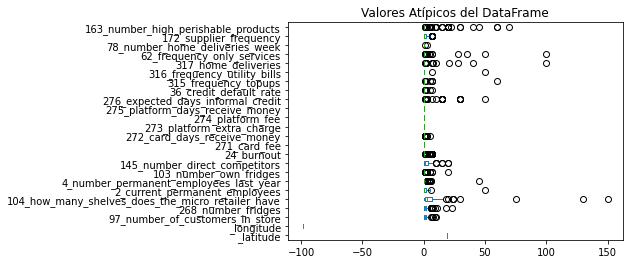

In [53]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(30,80))
data1.plot(kind="box",vert=False)
plt.title ("Valores Atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [54]:
#Método aplicando desviación estándar.Encuentro los valores extremos
y=data1
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Límite superior permitido",Limite_Superior)
print("Límite inferior permitido",Limite_Inferior)

Límite superior permitido _latitude                                            19.111172
_longitude                                          -98.090304
97_number_of_customers_in_store                       6.591777
268_number_fridges                                   10.151756
104_how_many_shelves_does_the_micro_retailer_have    55.812917
2_current_permanent_employees                        13.295707
4_number_permanent_employees_last_year               11.922542
103_number_own_fridges                                5.885954
145_number_direct_competitors                        12.488968
24_burnout                                            6.996329
271_card_fee                                          0.000000
272_card_days_receive_money                           2.123366
273_platform_extra_charge                             0.000000
274_platform_fee                                      0.000000
275_platform_days_receive_money                       0.000000
276_expected_days_informal_cr

In [55]:
#Encontramos Outliers del DataFrame
outliers=data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data12=data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data12

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,19.042794,-98.193802,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,19.042809,-98.193439,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,19.042558,-98.193818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#Identificar valores nulos por columna
valores_nulos=data12.isnull().sum()
valores_nulos

_latitude                                             0
_longitude                                            0
97_number_of_customers_in_store                       4
268_number_fridges                                    3
104_how_many_shelves_does_the_micro_retailer_have     3
2_current_permanent_employees                         1
4_number_permanent_employees_last_year                1
103_number_own_fridges                                3
145_number_direct_competitors                         4
24_burnout                                           11
271_card_fee                                          0
272_card_days_receive_money                           3
273_platform_extra_charge                             0
274_platform_fee                                      0
275_platform_days_receive_money                       0
276_expected_days_informal_credit                     6
36_credit_default_rate                                2
315_frequency_topups                            

In [58]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data12.copy()
data_clean=data_clean.fillna(round(data12.mean(),1))
data_clean

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,19.042794,-98.193802,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,19.042809,-98.193439,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,19.042558,-98.193818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Identificar valores nulos por columna
valores_nulos=data_clean.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
271_card_fee                                         0
272_card_days_receive_money                          0
273_platform_extra_charge                            0
274_platform_fee                                     0
275_platform_days_receive_money                      0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_freque

In [60]:
#Convertit DataFrame a CSV
data_clean.to_csv("Datos_limpios_microretailer_mit_lift_lab.csv")

In [61]:
#Descargar archivo filtrado en csv
files.download("Datos_limpios_microretailer_mit_lift_lab.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>